<h2> Nauczanie maszynowe/Ćwiczenia4

<h3> Drzewa decyzyjne

Drzewa decyzyjne to graficzna metoda wspomagania procesu decyzyjnego. Tworzony jest model drzewiasty, który następnie używany jest do klasyfiakcji.

Elementy struktury drzewa:
- wierzchołek (punkt górny drzewa), z którego następują odgałęzienia
- węzły poprzednika na wyższym poziomie o odgałęzieniach łączących węzły następnika na niższym poziomie
- liście stanowiące końcową część drzewa, którym przypisane są odpowiednie klasy.

Budujemy a w taki sposób aby minimalizować:

- współczynnik Giniego $I = 1 - \sum_i r_{i}^{2}$

lub 

- entropię $I = -\sum_i r_i \log_2 r_i$

gdzie $r_i$ to proporcja wystąpień $i-$tej klasy w aktualnym obszarze.

<h4> Zadanie1: Jaką minimalną i maksymalną wartość może przyjmować współczynnik Giniego? Uzasadnij. Co to wtedy oznacza?

**Rozwiązanie zadania nr 1:**

-Wspolczynnik Giniego osiaga wartosci od 0 do ~1. Wartosc jeden moze osiagnac tylko dla datasetu o nieskonczonej wartosci.
-Wartosc 0 oznacza zerowa roznorodnosc analizowanych danych, aka ich homologicznosc. Wartosci danych bliskie 1 oznaczaja
-maksymalna roznorodnosc - zbior nie zawiera wtedy powtarzajacych sie elementow.

In [7]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
np.unique(y)

array([0, 1, 2])

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [9]:
from sklearn.tree import DecisionTreeClassifier

Kryterium jest entropia

In [10]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train);

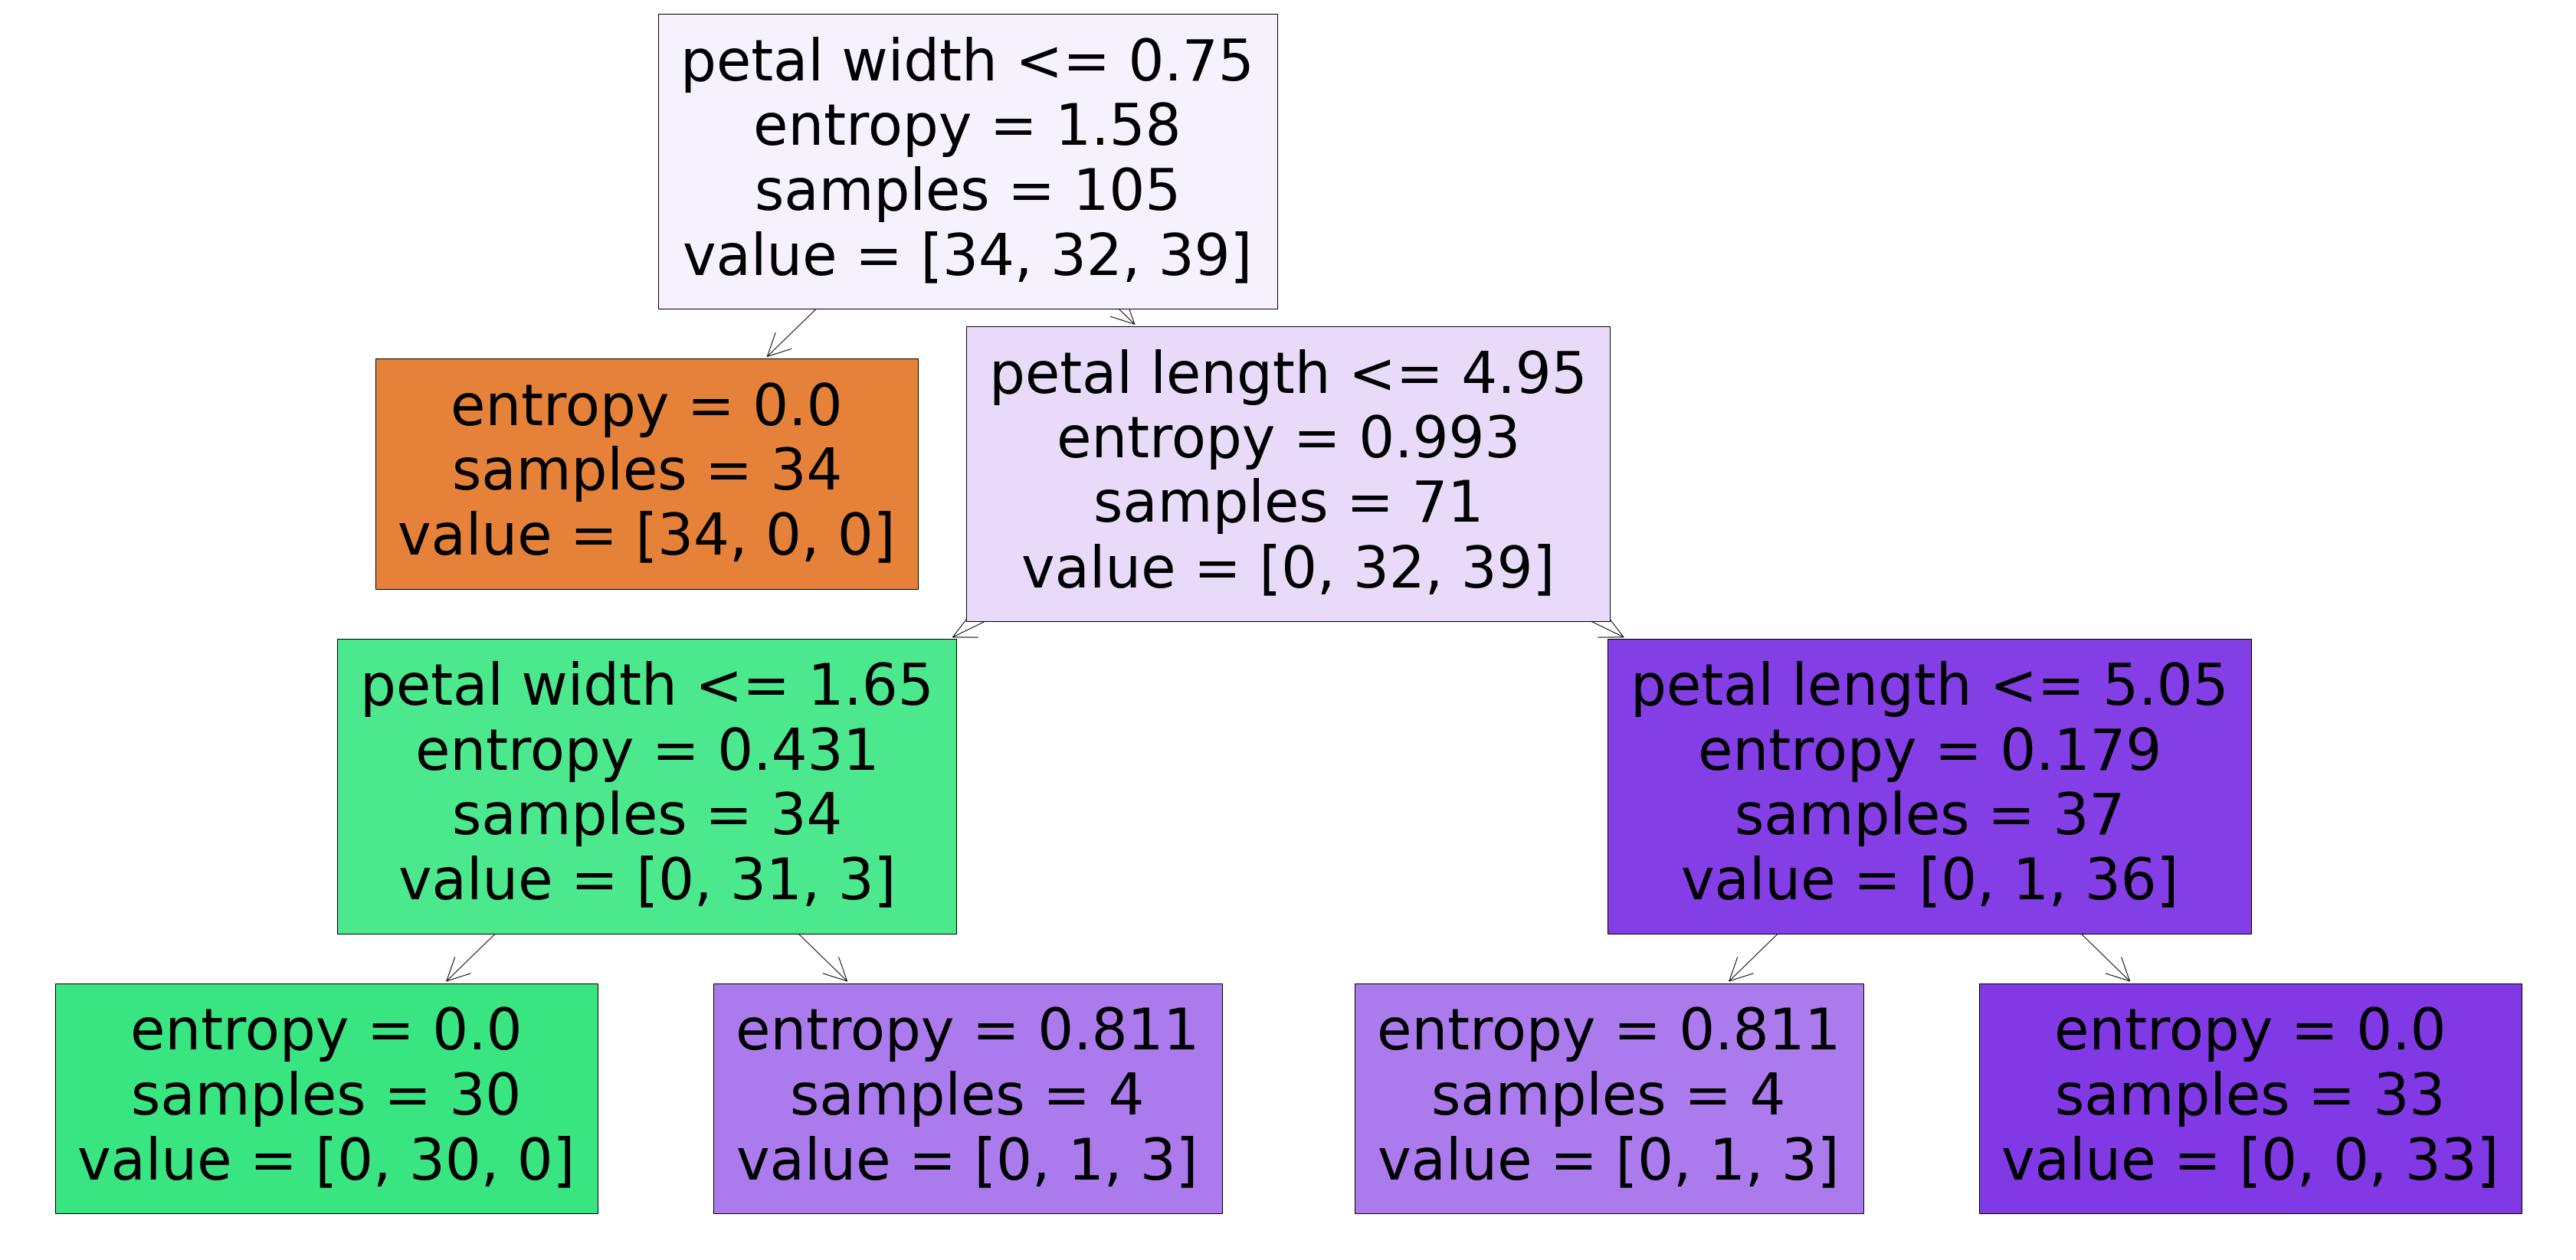

In [11]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(tree, filled=True, feature_names=['petal length', 'petal width']);

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


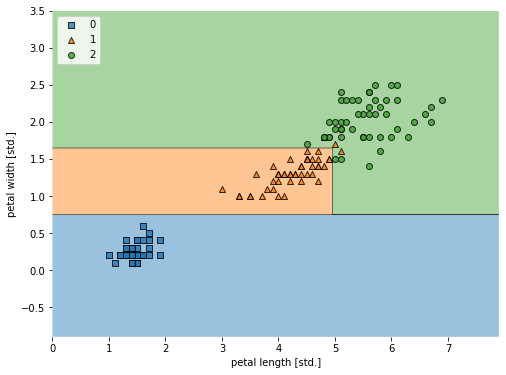

In [12]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X, y=y, clf=tree)
plt.xlabel('petal length [std.]')
plt.ylabel('petal width [std.]')
plt.legend(loc='upper left')
plt.show()

In [13]:
print(tree.predict([[1.4, 0.2]]))
print()
print(tree.predict([[5.1, 1.8]]))

[0]

[2]


<h4> Zadanie2: Uzasadnij wartość entropii w wierzchołku (u samej góry) poprzez bezpośrednie obliczenia.

In [14]:
# Rozwiązanie do zadania drugiego:
# Zadanie2: Uzasadnij wartość entropii = 1.58, dla podanego datasetu poprzez bezpośrednie obliczenia.

from sklearn import datasets
import numpy as np
import math
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)


def calc_entropy(y):
    uniq_elements, uniq_counts = np.unique(y, return_counts=True)
    uniq_weights = uniq_counts/len(y)
    entropy = 0
    for weight in uniq_weights:
        entropy -= weight*math.log2(weight)
    return entropy

print(calc_entropy(y_train))

## result of calculations for entropy: 1.5799176782552726

1.5799176782552726


Kryterium jest indeks Giniego

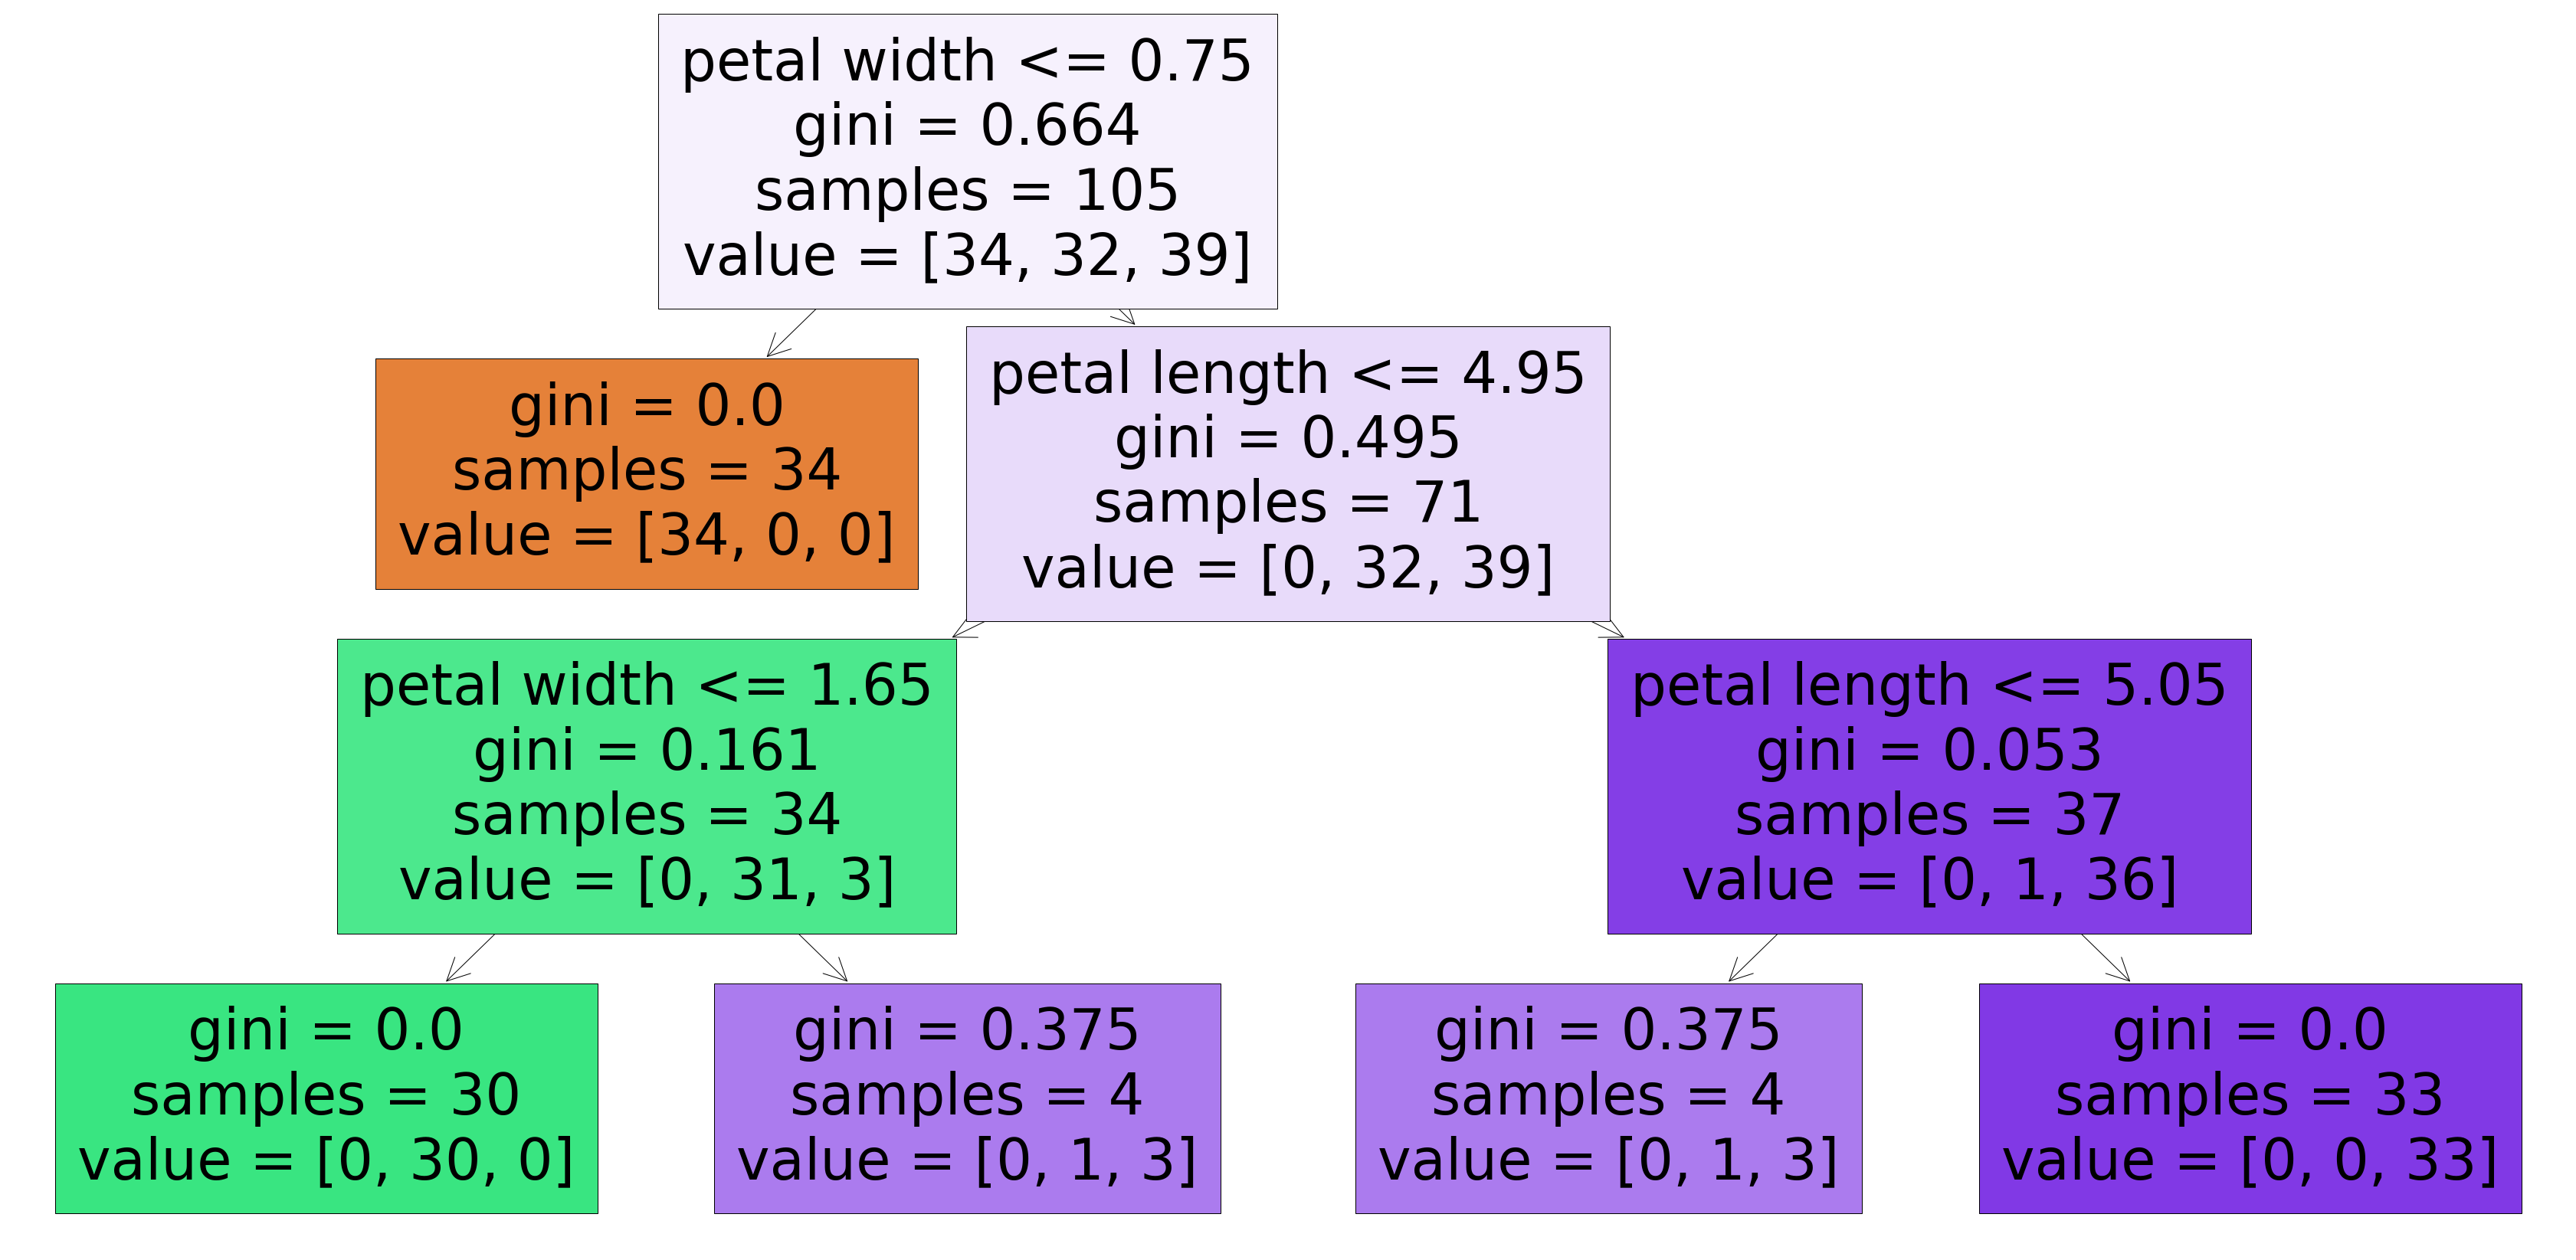

In [15]:
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
tree_gini.fit(X_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(tree_gini, filled=True, feature_names=['petal length', 'petal width']);

<h4> Zadanie3: Uzasadnij wartość indeksu Giniego w wierzchołku (u samej góry) poprzez bezpośrednie obliczenia.

In [16]:
# Rozwiązanie do zadania trzeciego: 
# Zadanie3: Uzasadnij wartość indeksu Giniego w datasecie poprzez bezpośrednie obliczenia.

from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

def calc_gini(y):
    uniq_elements, uniq_counts = np.unique(y, return_counts=True)
    uniq_weights = uniq_counts/len(y)
    gini = 1
    for weight in uniq_weights:
        gini -= weight**2
    return gini

print(calc_gini(y_train))

## rerult of gini is: 0.6643083900226757

0.6643083900226757


<h3> Las losowy (Random Forest)

Losowy las jest odmianą zespołu drzew decyzyjnych implementujących wiele losowo generowanych drzew decyzyjnych na raz, które wspópracując ze sobą, tworzą finalne rozwiązanie o podwyższonej dokładności.

- do przewidywania wartości zmiennej zależnej stosuje się zespół wielu, stosunkowo prostych drzew decyzyjnych
- każde drzewo dokonuje predykcji wartości zmiennej zależnej na podstawie losowego zespołu zmiennych niezależnych
- przewidywanie końcowej wartości modelu wyznaczoneg jest przez głosowanie (klasyfikacja) lub uśrednianie (zadanie regresji)

Użytkownik może określić:
- złożność drzew składowych
- maksymalna liczba drzew
- kryterium zakończenia procesu
- inne...

Dobrze sprawdza się na bardzo dużych zbiorach danych, z ogromną liczbą zmiennych niezależnych, bez konieczności ich usuwania.

In [17]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators - liczba drzew; inne np max_depth - maksymalna glębokosc drzewa, warto poczytac help(RandomForestClassifier)
forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=10,
                                 random_state=1)
forest.fit(X_train, y_train);

<h4> Zadanie4: Przeczytaj https://predictivesolutions.pl/jak-udoskonalic-algorytm-drzew-decyzyjnych. Sporządź odpowiednią notatkę.

** Drzewo decyzyjne stanowi strukturę używaną do rozdzielania dużej ilości danych poprzez algorytm, przy znanych regułach ich podziału. Ze wględu na wrażliwość drzew decyzyjnych na specyfikę zbioru danych, powstało kilka udoskonalonych modeli: **


*   AGREGACJA BOOTSTRAPOWA 

Rozwiązanie wykorzystujące predykcję wielu modeli drzew w jenym momencie, poprzez wykorzystanie kilku podzbiorów uczących na pierwotnym zbiorze danych. Podzbiory są wybierane losowo, ze zwracaniem danych do pierwotnego zbioru, przez co następuje wielokrotne losowanie na zbiór uczący i walidacyjny. Modele drzewa są budowane dla każdej z wylosowanych prób. Dzięki temu na wynik predykcji wpływają wszystkie drzewa użyte do trenowania modelu. 

Predykcja może być niedokładna, jeśli dane są silnie skorelowane. Wtedy ze wzdlędu na zastosowanie w baggingu tych samych predyktorów może dojść do powielania wyborów podziału, ponieważ wybierana będzie jedna zmienna najbardziej skorelowana ze zmeinną objaśnioną.
Potencjalne użycie dużej liczby zmiennych może powodować opóźnienia w budowaniu modelu ze względu na skomplikowanie obliczeń i zakłóca uzyskanie satysfakcjonująco stabilnego modelu ze zdolnością do uogólniania wyników. 

*   LASY LOSOWE

Jest to udoskonalony algorytm agregacji bootstrapowej, który rozwiązuje problemy regresyjne i klasyfikacyjne. W lesie losowym wykorzystywana jest część dostępnych predyktorów, dane do zbiorów są losowane również ze zwracaniem. 

W lasach losowych wynik stanowi wartość, która została przewidziana przez największą ilość pojedynczych modeli drzew, co zwiększa stabilność predykcji. 

*   ADABOOST

Metoda polega na łączeniu modeli w zespoły w celu zbudowania złożonego modelu z dużą siłą predykcyjną. W ADABOOST pojedyncze drzewa są sekwencyjne i niezależne do siebie, a klasyfikatory są ze sobą związane. 

Początkowy model jest udoskonalany poprzez precyzowanie wag iteracji. 

*   XGBOOST

Extreme Gradient Boosting, to algorytm wzmacniania gradientowego. Na klasyfikację mają wpływ drzewa użyte do budowy algorytmów. W modelu minimalizowane są błędy poprzez zastosowanie funkcji kosztu. Natępnie przez algorytm wprowadzana jest regularyzacja kontrolująca złożonośc modelu, przez co zwiększona jest dokładność przewodywania. 

<h4> Zadanie5: Modele lasu drzew decyzyjnych często wykorzystują metodę modyfikowania danych treningowych - agregację bootstrapową (bootstraping). Polega ona na wielokrotnym losowaniu ze zwracaniem. Jeżeli takie losowanie powtózymy $n$ razy, otrzymamy $n$ elementowy zbiór danych treningowych, w którym część przypadków będzie się powtarzać. Pokaż, że dla dużych $n$ próba będzie zawierała średnio $63 \%$ przypadków z orginalnego zbioru.

In [5]:
# Zadanie5: Modele lasu drzew decyzyjnych często wykorzystują metodę modyfikowania danych treningowych - agregację bootstrapową (bootstraping).
# Polega ona na wielokrotnym losowaniu ze zwracaniem. Jeżeli takie losowanie powtózymy n
# razy, otrzymamy elementowy zbiór danych treningowych, w którym część przypadków będzie się powtarzać.
# Pokaż, że dla dużych n próba będzie zawierała średnio 63% przypadków z orginalnego zbioru.

from sklearn import datasets
import random
import numpy as np
import difflib
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# creating a list containing 100 different elements
y = range(1, 100)

def element_lotto(set,n):
    # create a list saving the amount of repeating elements from each bagging
    repeating_elements = []
    for i in range(n):
        new_set = []
        for j in range(len(set)):
            # bag a new set of items
            new_set.append(set[random.randint(0, len(set)-1)])
        # add count of repeating elements
        repeating_elements.append(len(np.unique(new_set)))
    return repeating_elements

print(np.mean(element_lotto(y,1000)))

##mean(element lotto is 6.674)

62.692


<h3> Drzewa losowe do wyboru cech (Feature importance)

In [ ]:
import pandas as pd

df_wine = pd.read_csv('wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanolds', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)


feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=2)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]): #tyle cech
    print(f"{f+1} {feat_labels[f]} {round(importances[indices[f]],4)}")

1 Alcohol 0.1725
2 Malic acid 0.1571
3 Ash 0.1526
4 Alcalinity of ash 0.1103
5 Magnesium 0.109
6 Total phenols 0.0806
7 Flavanolds 0.0536
8 Nonflavanoid phenols 0.0414
9 Proanthocyanins 0.0348
10 Color intensity 0.0298
11 Hue 0.0254
12 OD280/OD315 of diluted wines 0.0185
13 Proline 0.0144


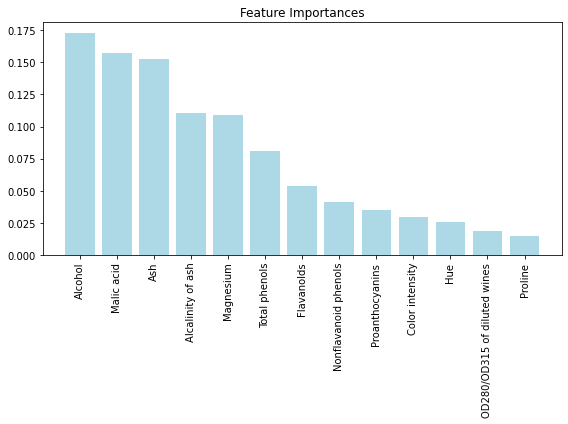

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

<h3> Regresja za pomocą drzew losowych

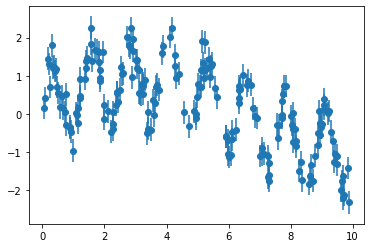

In [ ]:
rng = np.random.RandomState(42)
x = 10* rng.rand(200)

def model(x, sigma = 0.3):
    fast_oscillation = np.sin(5*x)
    slow_oscillation = np.sin(0.5*x)
    noise = sigma*rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)

plt.errorbar(x, y, 0.3, fmt = "o")
plt.show()

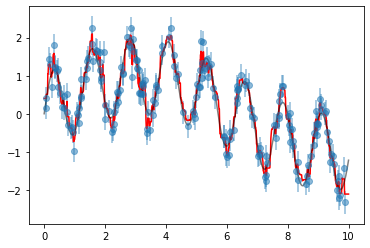

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(200)
forest.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, np.newaxis])
ytrue = model(xfit, sigma = 0)

plt.errorbar(x, y, 0.3, fmt = "o", alpha =0.5)
plt.plot(xfit, yfit, "-r")
plt.plot(xfit, ytrue, "-k", alpha = 0.5)
plt.show()

<h3> Lasy losowe do klasyfikacji cyfr

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

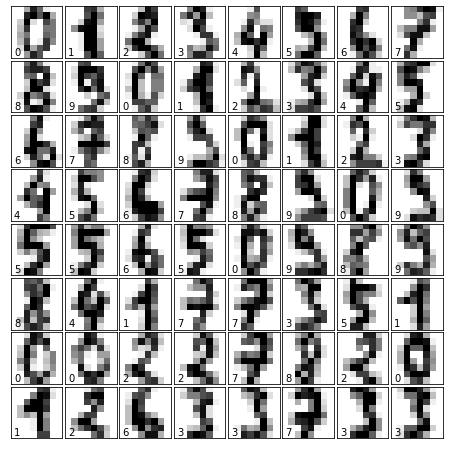

In [ ]:
fig = plt.figure(figsize = (6,6))
fig.subplots_adjust(left = 0, right =1, bottom=0, top=1, hspace=0.05,wspace=0.05)

for i in range(64): #kazde zdjecie jest 8x8
    ax = fig.add_subplot(8, 8, i+1, xticks = [], yticks =[])
    ax.imshow(digits.images[i], cmap = plt.cm.binary, interpolation = "nearest")
    ax.text(0, 7, str(digits.target[i])) #dodajemy label

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state = 0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



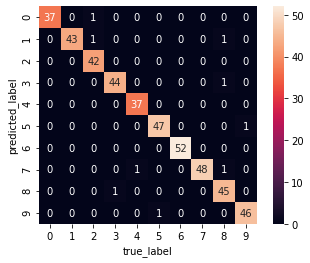

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = True)
plt.xlabel("true_label")
plt.ylabel("predicted_label")
plt.show()

<h4> Zadanie6: Rozważ dane zawierające nagłówki, przy czym są to fake newsy (1298) oraz prawdziwe tytuły (1968). Jeden nagłówek to jeden rekord. 
    
- Wyznacz częstości występowania wszystkich słów ze wszystkich nagłówków.
- Jakie słowa (oprócz stopwordsów) najczęściej pojawiały się w realnych a jakie w fałszywych nagłówkach?

    Będziemy tworzyć klasyfiaktor dla tych danych w oparciu o regresję logistyczną oraz drzewa losowe/lasy losowe. Każdy nagłówek będzie reprezentowany w postaci wektora zer i jedynek w zależności od występowania danego słowa (długość wektora = liczba wszystkich unikatowych słów, może warto jednak zawęzić? albo potraktować jako hiperparametr).
    Podziel dane na 3 grupy: 70% zbiór treningowy, 15% zbiór walidacyjny, 15% zbiór testowy. Przetestuj różne zestawy hiperparametrów na zbiorze walidacyjnym. Skomentuj otrzymane wyniki.

In [4]:
# Zadanie6: Rozważ dane zawierające nagłówki, przy czym są to fake newsy (1298) oraz prawdziwe tytuły (1968).
# Jeden nagłówek to jeden rekord.
# Wyznacz częstości występowania wszystkich słów ze wszystkich nagłówków.
# Jakie słowa (oprócz stopwordsów) najczęściej pojawiały się w realnych a jakie w fałszywych nagłówkach?
# Będziemy tworzyć klasyfiaktor dla tych danych w oparciu o regresję logistyczną oraz drzewa losowe/lasy losowe.
# Każdy nagłówek będzie reprezentowany w postaci wektora zer i jedynek w zależności od występowania danego słowa
# (długość wektora = liczba wszystkich unikatowych słów, może warto jednak zawęzić? albo potraktować jako hiperparametr).
# Podziel dane na 3 grupy: 70% zbiór treningowy, 15% zbiór walidacyjny, 15% zbiór testowy.
# Przetestuj różne zestawy hiperparametrów na zbiorze walidacyjnym. Skomentuj otrzymane wyniki.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# loading the data
with open("C:\Users\katar\Downloads\real.txt") as f:
    real_data = f.readlines()
f.close()

with open("C:\Users\katar\2021\2022\Downloads\fake.txt") as f:
    fake_data = f.readlines()
f.close()


# flatten the data for further processing:
def flatten(l):
    flat_list = []
    for sublist in l:q
        flat_list.extend(sublist.split())
    return flat_list


real_flat_data = flatten(real_data)
fake_flat_data = flatten(fake_data)

# count occurrences
real_set, real_count = np.unique(real_flat_data, return_counts=True)
fake_set, fake_count = np.unique(fake_flat_data, return_counts=True)

# sort by occurrences
real_count, real_set = zip(*sorted(zip(real_count, real_set), reverse=True))
fake_count, fake_set = zip(*sorted(zip(fake_count, fake_set), reverse=True))

#plot data
# plt.subplot(2, 1, 1)
# plt.bar(real_set[:20], real_count[:20])
# plt.title('Top 20 word occurrences in real news headlines')
# plt.subplot(2, 1, 2)
# plt.bar(fake_set[:20], fake_count[:20])
# plt.title('Top 20 word occurrences in fake news headlines')
# plt.show()

# Converting the data into 0,1 vector
total_set = np.unique(np.append(list(real_set), fake_set))


def transf_data_2_bool(data, key):
    output_data = []
    for idx, line in enumerate(data):
        output_data.append(np.isin(key, line))
    return output_data


# defining x and y
bool_total_data = transf_data_2_bool([line.split() for line in real_data + fake_data], total_set)
y = np.concatenate((np.ones(len(real_data), dtype=int), np.zeros(len(fake_data), dtype=int)))

# Splitting the data into train, test, val

X_train, X_temp, y_train, y_temp = train_test_split(bool_total_data, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3)

# Create model
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Omowienie wynikow: Model jest zdolny do przewidywania "fake newsow" na podstawie pojedynczych slow ze zdolnoscia
# okolo 80%. Warto jednak zaznaczyc, ze moze to w duzej mierze wynikac z zastosowanego zestawu 'fake newsow'. W celu
# zwiekszenia realnej wartosci modelu zalecana bylaby lemmatyzacja slow, oraz przeprowadzenie grupowania po 2 - 3 wyrazy
# powinno to zwiekszyc zdolnosc modelu do rozpoznawania "realnych" polaczen slow od przypadkowych ulozen.

SyntaxError: ignored

<h3> Uzupełnienie

<h3> Więcej o agregracji bootstrapowej w kontekście lasów losowych

Proces uczenia modelu lasu:
    
- z danych treningowych jest losowana próba bootstrap (wybiera się z powtórzeniami $k$ przypadków)
- próba ta jest używana do uczenia pojedynczego drzewa decyzyjnego. Takie drzewo jest tworzone na podstawie losowo wybranych $x$ atrybutów (z listy wszystkich dostępnych)
- zbudowane drzewo jest oceniane za pomocą przypadków niewybranych do próby bootstrap -> mierzymy: dokładność predykcji, wpływ atrybutów wejściowych na dokładność predykcji
- powtarzamy poprzednie kroki $n$ razy
- odpowiedzi na zapyania predykcyjne (wyniki zwracane przez model) są ustalane przez głosowanie przy użyciu wchodzących w jego skład drzew decyzyjnych (głosowanie większościowe)

Zalety:
- zmniejszamy ryzyko przeuczenia modelu
- stabilność modelu (mniej prawdopodobne wyniki odrzucane)


In [ ]:
import pandas as pd
df_wine = pd.read_csv('wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanolds', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [6]:
#jedno drzewo, niezle ale troche przetrenowane
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred  = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test  = accuracy_score(y_test,  y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'%(tree_train, tree_test))

NameError: ignored

In [5]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator=tree, 
                        n_estimators=500, 
                        max_samples=1., 
                        max_features=1., 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred  = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test  = accuracy_score(y_test,  y_test_pred)
print('Bagging tree train/test accuracies %.3f/%.3f'%(bag_train, bag_test))

NameError: ignored